# Study 1: Fit with existing data from salesforce

In [118]:
# No changes to the analysis here

In [6]:
#estimated time
((4 * 7 * 2 * 100 * 9)/60)/44

19.09090909090909

# Study 2: Performance of proposed approaches

In [144]:
import pandas as pd
import numpy as np
import statsmodels
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
experiments = pd.read_csv("../results/experiments.csv")
experiments.head()

,F_priority_scheme,F_number_of_agents,F_hard_ceiling,ceiling_value,burn_in,days,startdate,repetition,closed_avg_simulated_NPS,closed_avg_simulated_throughput_time,...,h1_cases_arrived,h1_cases_closed,h2_cases_arrived,h2_cases_closed,h2_n_promoters,h2_n_detractors,h2_n_neutrals,h2_SIM_NPS,h2_closed_avg_simulated_NPS,h2_closed_avg_simulated_throughput_time
0,FCFS,3,NONE,2.5,0,365,2018-07-01,0,-1,90.218883,...,389.0,302.0,389.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,SRTF,3,NONE,2.5,0,365,2018-07-01,0,-1,25.034114,...,362.0,183.0,362.0,106.0,34.0,42.0,30.0,-7.547170,8.128492,17.480474
2,LRTF,3,NONE,2.5,0,365,2018-07-01,0,-1,12.111148,...,389.0,147.0,389.0,130.0,57.0,46.0,27.0,8.461538,8.652812,10.056297
3,NPS,3,NONE,2.5,0,365,2018-07-01,0,-1,13.714178,...,381.0,158.0,381.0,138.0,70.0,41.0,27.0,21.014493,9.151989,10.268588
4,FCFS,6,NONE,2.5,0,365,2018-07-01,0,-1,53.041304,...,413.0,413.0,413.0,164.0,65.0,56.0,43.0,5.487805,8.623977,88.044488


In [146]:
experiments.loc[0].to_dict()

{'F_priority_scheme': 'FCFS',
 'F_number_of_agents': 3,
 'F_hard_ceiling': 'NONE',
 'ceiling_value': 2.5,
 'burn_in': 0,
 'days': 365,
 'startdate': '2018-07-01',
 'repetition': 0,
 'closed_avg_simulated_NPS': -1,
 'closed_avg_simulated_throughput_time': 90.21888255343302,
 'closed_avg_predicted_NPS': -1,
 'closed_avg_predicted_throughput_time': -1,
 'closed_avg_predicted_NPS_priority': -1,
 'closed_avg_initial_delay': -1,
 'closed_avg_activity_start_delay': -1,
 'closed_avg_duration_delayed': -1,
 'all_avg_simulated_NPS': -1,
 'all_avg_simulated_throughput_time': -1,
 'all_avg_predicted_NPS': -1,
 'all_avg_predicted_throughput_time': -1,
 'all_avg_predicted_NPS_priority': -1,
 'all_avg_initial_delay': -1,
 'all_avg_activity_start_delay': -1,
 'all_avg_duration_delayed': -1,
 'cases_arrived': 722,
 'cases_closed': 302,
 'case_queued': -1,
 'cases_assigned_at_end': -1,
 'min_tracelen': 1,
 'max_tracelen': 12,
 'Simulation_duration_min': -1,
 'RUN': 0,
 'Done': 0,
 'closed_avg_simulated_

# Effects on customer tNPS

### Means

In [147]:
 #Crosstab AE by trace length
    
response = "SIM_NPS"
factors = ["F_hard_ceiling","F_priority_scheme","F_number_of_agents"]
    
pivottable = pd.pivot_table(experiments, 
                            values=response,
                            columns=factors, 
                            aggfunc=np.mean).T

#pivottable = pivottable.reset_index()

pivottable

SIM_NPS
F_hard_ceiling F_priority_scheme F_number_of_agents           
NONE           FCFS              3                    9.907081
                                 6                   11.924699
                                 9                   15.376416
                                 12                  15.819253
               LRTF              3                   14.103975
                                 6                   14.212890
                                 9                   15.457909
                                 12                  15.691653
               NPS               3                   14.429961
                                 6                   14.513380
                                 9                   15.664980
                                 12                  15.803783
               SRTF              3                   13.919338
                                 6                   14.633447
                                 9                   15.154745
                                 12                  16.113106
SLA            FCFS              3                    9.722875
                                 6                   11.758124
                                 9                   15.086855
                                 12                  15.864718
               LRTF              3                    9.888087
                                 6                   11.772532
                                 9                   15.313263
                                 12                  15.712204
               NPS               3                    9.679748
                                 6                   11.504972
                                 9                   15.283985
                                 12                  15.742137
               SRTF              3                    9.950810
                                 6                   11.859605
                                 9                   15.279690
                                 12                  15.830169

In [148]:


string = str((pivottable.to_latex(index=True)))
string = string.replace('!', '$\pm$')

string = string.replace("toprule","hline")
string = string.replace("midrule","hline")
string = string.replace("bottomrule","hline") #

string = string.replace("MAE           &","$MAE$           &")
string = string.replace("MAE\_Etd","$MAE_{EtD}$")
string = string.replace("MAE\_Mtd","$MAE_{MtD}$")
string = string.replace("MAE\_Ptd","$MAE_{PtD}$")

string = string.replace("llr","|l|l|r|")

string = string.replace("data","Loss function")

string = string.replace("loss\_function &             &              &               &                  \\","")

string = string.replace('F\_number\_of\_agents', 'Number of agents')
string = string.replace('F\_priority\_scheme', 'Priority scheme')
string = string.replace('closed\_avg\_simulated\_NPS', 'Simulated tNPS')

pivottable
print(string)

\begin{tabular}{l|l|l|r|}
\hline
    &      &    &    SIM\_NPS \\
F\_hard\_ceiling & Priority scheme & Number of agents &            \\
\hline
NONE & FCFS & 3  &   9.907081 \\
    &      & 6  &  11.924699 \\
    &      & 9  &  15.376416 \\
    &      & 12 &  15.819253 \\
    & LRTF & 3  &  14.103975 \\
    &      & 6  &  14.212890 \\
    &      & 9  &  15.457909 \\
    &      & 12 &  15.691653 \\
    & NPS & 3  &  14.429961 \\
    &      & 6  &  14.513380 \\
    &      & 9  &  15.664980 \\
    &      & 12 &  15.803783 \\
    & SRTF & 3  &  13.919338 \\
    &      & 6  &  14.633447 \\
    &      & 9  &  15.154745 \\
    &      & 12 &  16.113106 \\
SLA & FCFS & 3  &   9.722875 \\
    &      & 6  &  11.758124 \\
    &      & 9  &  15.086855 \\
    &      & 12 &  15.864718 \\
    & LRTF & 3  &   9.888087 \\
    &      & 6  &  11.772532 \\
    &      & 9  &  15.313263 \\
    &      & 12 &  15.712204 \\
    & NPS & 3  &   9.679748 \\
    &      & 6  &  11.504972 \\
    &      & 9  &  15.2839

C:\Users\Mike\AppData\Local\Temp\ipykernel_25244\1350266391.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string = str((pivottable.to_latex(index=True)))


### F-test

In [149]:
def f_test(group1, group2, log_trans=False):
    
    #log transform
    if log_trans == True:
        group1 = np.log(1+group1)
        group2 = np.log(1+group2)
    
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun)
    return f, p_value
  

In [150]:
baseline = experiments.loc[experiments.F_priority_scheme == "FCFS", response]
candidate = experiments.loc[experiments.F_priority_scheme == "NPS", response]

#perform f_test:
f_value, p_value = f_test(baseline.values, candidate.values, log_trans=False)
f_value, p_value

(1.0591458305525179, 0.20844509993373317)

### Boxplot

In [151]:
import matplotlib.pyplot as plt

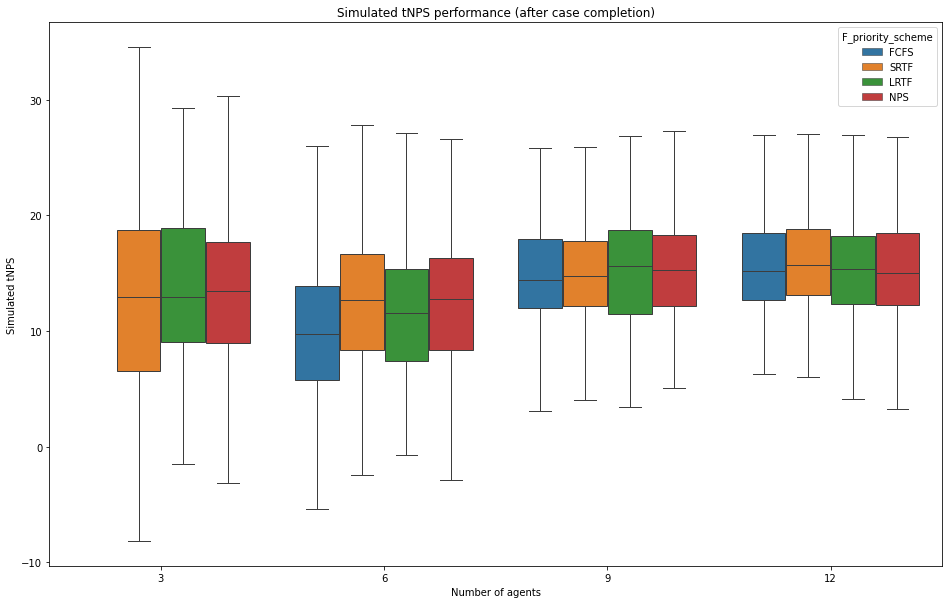

In [156]:
fig = plt.figure(figsize=(16, 10))

hue_order = ["FCFS","SRTF","LRTF","NPS"]

sns.boxplot(x=experiments.F_number_of_agents,
            y=experiments[response],
            hue=experiments.F_priority_scheme,
            hue_order = hue_order,
            width=0.8,
            dodge=True,
            showfliers = False,
            linewidth=1,
            whis=1.5)

plt.xlabel("Number of agents")
plt.ylabel("Simulated tNPS")

plt.title("Simulated tNPS performance (after case completion)")


plt.savefig("NPS_performance.png", dpi=200, bbox_inches = "tight")

plt.show()

## Linear model

In [129]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
#https://www.statsmodels.org/dev/example_formulas.html

In [130]:
formula = response + "~ F_number_of_agents + F_priority_scheme + F_number_of_agents*F_priority_scheme"

In [131]:
experiments["F_priority_scheme"] = experiments.F_priority_scheme.astype('category')
experiments["F_number_of_agents"] = experiments.F_number_of_agents.astype('category')

In [132]:
ols_model = smf.ols(formula=formula, data=experiments)

In [133]:
ols_results = ols_model.fit()

In [134]:
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                SIM_NPS   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     3.630
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           0.000333
Time:                        14:47:09   Log-Likelihood:                -121.35
No. Observations:                  64   AIC:                             274.7
Df Residuals:                      48   BIC:                             309.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

# New measurement:

In [135]:
#NPS = % promoters - % detractors

In [136]:
"""
Using our approach, there should be more promoters

for each experiment:

    Calculate NPS score

"""

'\nUsing our approach, there should be more promoters\n\nfor each experiment:\n\n    Calculate NPS score\n\n'

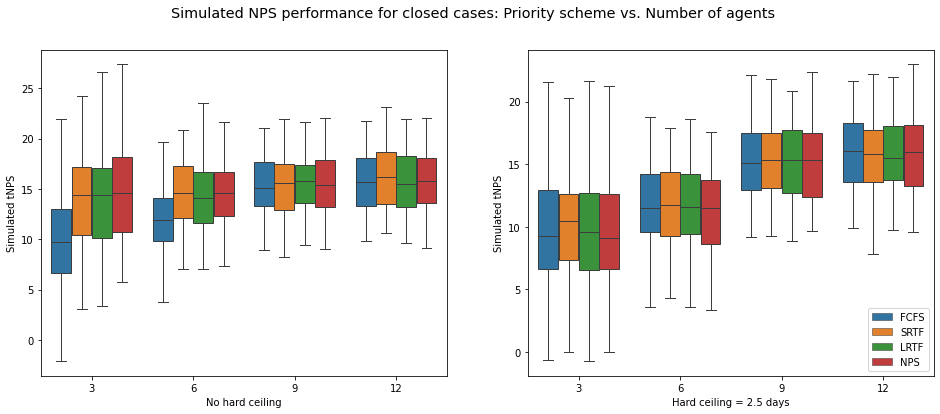

In [157]:
response = "SIM_NPS"

fig, ax = plt.subplots(
    nrows=1,
    ncols=2, figsize=(16, 6))

st = fig.suptitle("Simulated NPS performance for closed cases: Priority scheme vs. Number of agents", fontsize="x-large")

""" divide to two plots"""

width = 0.8
linewidth = 1

hue_order = ["FCFS","SRTF","LRTF","NPS"]

NONE = experiments.loc[experiments.F_hard_ceiling == "NONE"]

sns.boxplot(x=NONE.F_number_of_agents,
            y=NONE[response],
            hue=NONE.F_priority_scheme,
            hue_order = hue_order,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=linewidth,
            whis=1.5,
            ax=ax[0])


SLA = experiments.loc[experiments.F_hard_ceiling == "SLA"]

sns.boxplot(x=SLA.F_number_of_agents,
            y=SLA[response],
            hue=SLA.F_priority_scheme,
            hue_order = hue_order,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=linewidth,
            whis=1.5,
            ax=ax[1])

#fig.title("Simulated tNPS performance (after case completion)")

ax[0].set(ylabel='Simulated tNPS', xlabel='No hard ceiling')#, ylim=[-93,-83])
ax[0].legend([],[], frameon=False)

ax[1].set(ylabel='Simulated tNPS', xlabel='Hard ceiling = 2.5 days')#, ylim=[-93,-83])
ax[1].legend(loc='lower right')


# Divided by periods

In [138]:
#experiments.loc[0]

In [139]:
RUN = 0
TS = pd.read_csv("../results/"+str(RUN)+"/"+str(RUN)+"_timeseries.csv")

In [140]:
#TS

In [141]:
h1=0
h2=182

In [142]:
"""
Do this in the post-processing and name the results as unique variables
"""

'\nDo this in the post-processing and name the results as unique variables\n'

https://stackoverflow.com/questions/27426668/row-titles-for-matplotlib-subplot

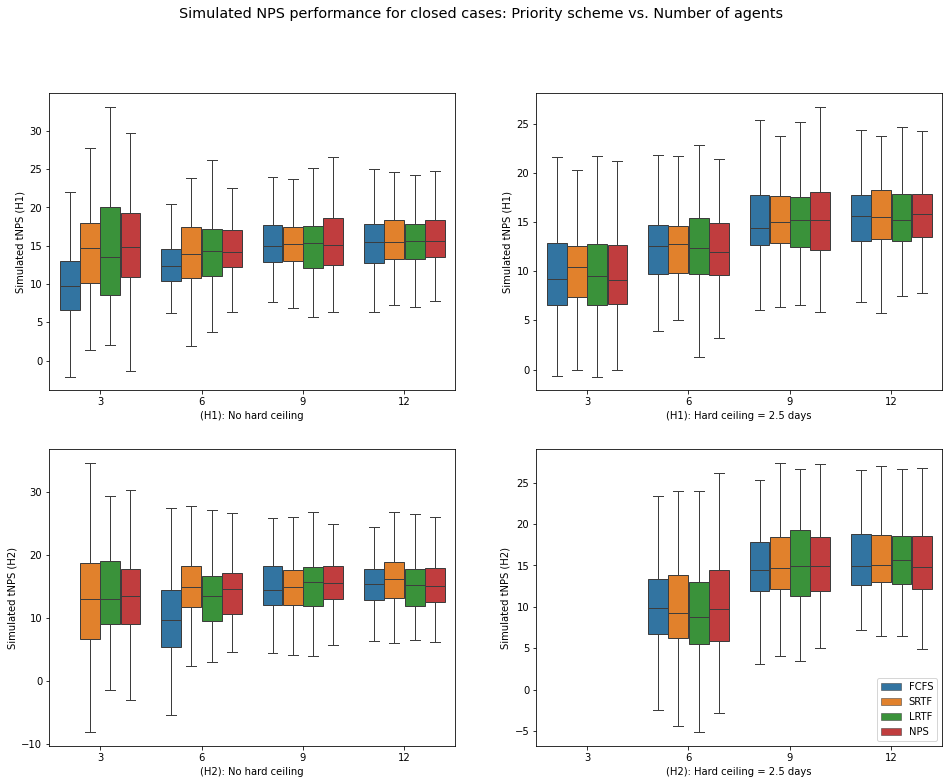

In [158]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=2, 
    figsize=(16, 12))

st = fig.suptitle("Simulated NPS performance for closed cases: Priority scheme vs. Number of agents", fontsize="x-large")

""" divide to two plots"""

width = 0.8
linewidth = 1

hue_order = ["FCFS","SRTF","LRTF","NPS"]

"""
ROW 1
"""
response = "h1_SIM_NPS"

NONE = experiments.loc[experiments.F_hard_ceiling == "NONE"]

sns.boxplot(x=NONE.F_number_of_agents,
            y=NONE[response],
            hue=NONE.F_priority_scheme,
            hue_order = hue_order,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=linewidth,
            whis=1.5,
            ax=ax[0,0])


SLA = experiments.loc[experiments.F_hard_ceiling == "SLA"]

sns.boxplot(x=SLA.F_number_of_agents,
            y=SLA[response],
            hue=SLA.F_priority_scheme,
            hue_order = hue_order,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=linewidth,
            whis=1.5,
            ax=ax[0,1])

"""
Row 2
"""
response = "h2_SIM_NPS"

NONE = experiments.loc[experiments.F_hard_ceiling == "NONE"]

sns.boxplot(x=NONE.F_number_of_agents,
            y=NONE[response],
            hue=NONE.F_priority_scheme,
            hue_order = hue_order,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=linewidth,
            whis=1.5,
            ax=ax[1,0])


SLA = experiments.loc[experiments.F_hard_ceiling == "SLA"]

sns.boxplot(x=SLA.F_number_of_agents,
            y=SLA[response],
            hue=SLA.F_priority_scheme,
            hue_order = hue_order,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=linewidth,
            whis=1.5,
            ax=ax[1,1])


#fig.title("Simulated tNPS performance (after case completion)")

ax[0,0].set(ylabel='Simulated tNPS (H1)', xlabel='(H1): No hard ceiling')#, ylim=[-93,-83])
ax[0,0].legend([],[], frameon=False)

ax[0,1].set(ylabel='Simulated tNPS (H1)', xlabel='(H1): Hard ceiling = 2.5 days')#, ylim=[-93,-83])
ax[0,1].legend([],[], frameon=False)


#ax[0,1].set_title("test")


ax[1,0].set(ylabel='Simulated tNPS (H2)', xlabel='(H2): No hard ceiling')#, ylim=[-93,-83])
ax[1,0].legend([],[], frameon=False)

ax[1,1].set(ylabel='Simulated tNPS (H2)', xlabel='(H2): Hard ceiling = 2.5 days')#, ylim=[-93,-83])
ax[1,1].legend(loc='lower right')
